In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from apollo.src.service.aip_service import invest_week_with_start_interval 

In [2]:
# 易方达蓝筹 005827
df_005827 = invest_week_with_start_interval(code='005827', 
                                            start_interval=('2021-01-08', '2021-02-23'), 
                                            end='2021-08-09', 
                                            amount=100)
# 国泰智能汽车 001790
df_001790 = invest_week_with_start_interval(code='001790', 
                                            start_interval=('2021-01-08', '2021-02-23'), 
                                            end='2021-08-09', 
                                            amount=100)
# 中欧医疗健康混合 003095
df_003095 = invest_week_with_start_interval(code='003095', 
                                            start_interval=('2021-01-08', '2021-02-23'), 
                                            end='2021-08-09', 
                                            amount=100)

# 招商白酒 161725
df_161725 = invest_week_with_start_interval(code='161725', 
                                            start_interval=('2021-01-08', '2021-02-23'), 
                                            end='2021-08-09', 
                                            amount=100)
# 华鹏酒 160632
df_160632 = invest_week_with_start_interval(code='160632', 
                                            start_interval=('2021-01-08', '2021-02-23'), 
                                            end='2021-08-09', 
                                            amount=100)

2021-08-11 23:05:09 - aip_service.py - 42 - INFO: 统计完成，005827 每周定投100，起始日区间为('2021-01-08', '2021-02-23'), 结束日为2021-08-09.
2021-08-11 23:05:33 - aip_service.py - 42 - INFO: 统计完成，001790 每周定投100，起始日区间为('2021-01-08', '2021-02-23'), 结束日为2021-08-09.
2021-08-11 23:05:55 - aip_service.py - 42 - INFO: 统计完成，003095 每周定投100，起始日区间为('2021-01-08', '2021-02-23'), 结束日为2021-08-09.
2021-08-11 23:06:18 - aip_service.py - 42 - INFO: 统计完成，161725 每周定投100，起始日区间为('2021-01-08', '2021-02-23'), 结束日为2021-08-09.
2021-08-11 23:06:40 - aip_service.py - 42 - INFO: 统计完成，160632 每周定投100，起始日区间为('2021-01-08', '2021-02-23'), 结束日为2021-08-09.


In [38]:
def show_diff_box_plot(df_dict, figsize=(20, 7), notch=True, vert=True):
    '''
    一次可以看多个基金的周定投-箱型图，适合不同领域基金之间比较
    
    :param df_dict: 基金字典    dict  {'LanChou':df_005827, 'GuoTaiChe':df_001790, 'ZhongOuYiliao':df_003095}
    :param figsize: 画布大小    tuple (20, 7)
    :param notch:   是否为凹口型 bool  True
    :param vert:    是否垂直放置 bool  True
    '''
    
    funds_cnt = len(df_dict)
    ax_list = [None for _ in range(funds_cnt)]
    plot_list = []
    labels = [f"week {day}" for day in range(1, 6)]
    
    fig, ax_list = plt.subplots(nrows=1, ncols=funds_cnt, figsize=figsize)
    
    i = 0
    for fund, fund_df in df_dict.items():
        # 每周一个box
        boxes = [fund_df.loc[fund_df['week'] == day]['profit_rate'] for day in range(1, 6)]
        
        box_plot = ax_list[i].boxplot(boxes,
                                      notch=notch,  # notch shape
                                      vert=vert,  # vertical box alignment
                                      patch_artist=True,  # fill with color
                                      labels=labels)  # will be used to label x-ticks
        ax_list[i].set_title(fund)
        plot_list.append(box_plot)
        i += 1
        
    # fill with colors
    colors = ['lightsalmon', 'lightyellow', 'lightgreen', 'lightblue', 'lightpink']
    for box_plot in plot_list:
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)

    # adding horizontal grid lines
    for ax in ax_list:
        ax.yaxis.grid(True)
        ax.set_ylabel('Profit Rate / %')
        
    
    plt.show()

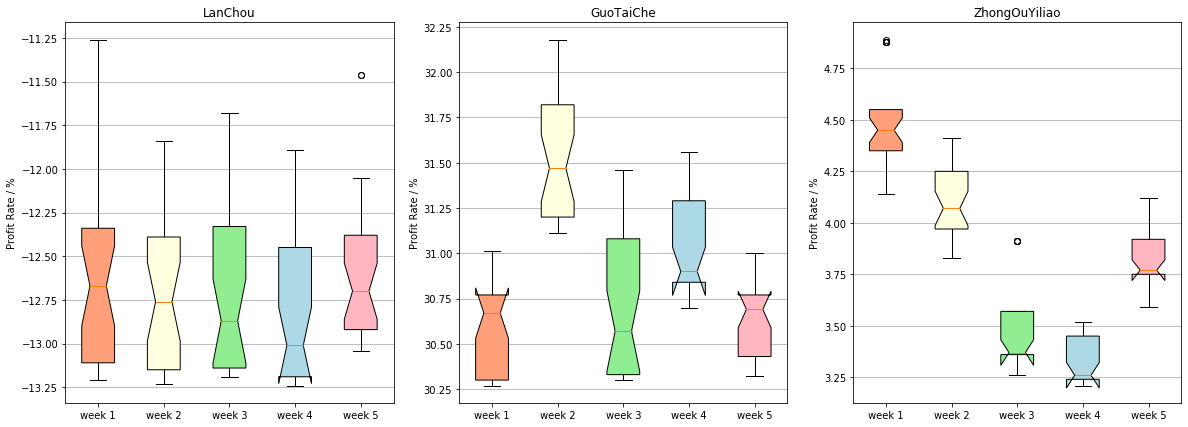

In [39]:
show_diff_box_plot({'LanChou':df_005827, 
                    'GuoTaiChe':df_001790, 
                    'ZhongOuYiliao':df_003095})

In [54]:
def show_one_box_plot(df_dict, figsize=(20, 6), notch=True, vert=True):
    '''
    适合同一领域基金放在一起比较,最多支持5个基金比较
    
    :param df_dict: 基金字典    dict  {'ZhaoShang':df_161725, 'HuaPeng':df_160632}
    :param figsize: 画布大小    tuple (20, 10)
    :param notch:   是否为凹口型 bool  True
    :param vert:    是否垂直放置 bool  True
    '''
    
    funds_cnt = len(df_dict)
    boxes_list = []
    labels = ['' for _ in range(5 * funds_cnt)]
    i = 1
    for key in df_dict:
        labels[i*5-3] = key
        i += 1
        
    
    # 因为要画水平线，就只能用子图
    fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    for fund, fund_df in df_dict.items():
        boxes_list.extend([fund_df.loc[fund_df['week'] == day]['profit_rate'] for day in range(1, 6)])
    
    box_plot = ax.boxplot(boxes_list,
                          notch=notch,  # notch shape
                          vert=vert,  # vertical box alignment
                          patch_artist=True,  # fill with color
                          labels=labels)  # will be used to label x-ticks
    
    ax.set_title("Automatic Investment Plan")
    
    
    # box 上色，每个基金一种颜色
    colors = ['lightsalmon', 'lightyellow', 'lightgreen', 'lightblue', 'lightpink']
    for i in range(funds_cnt):
        for patch, color in zip(box_plot['boxes'][i*5:i*5+5], [colors[i]]*5):
            patch.set_facecolor(color)

    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_ylabel('Profit Rate / %')
        
    
    plt.show()

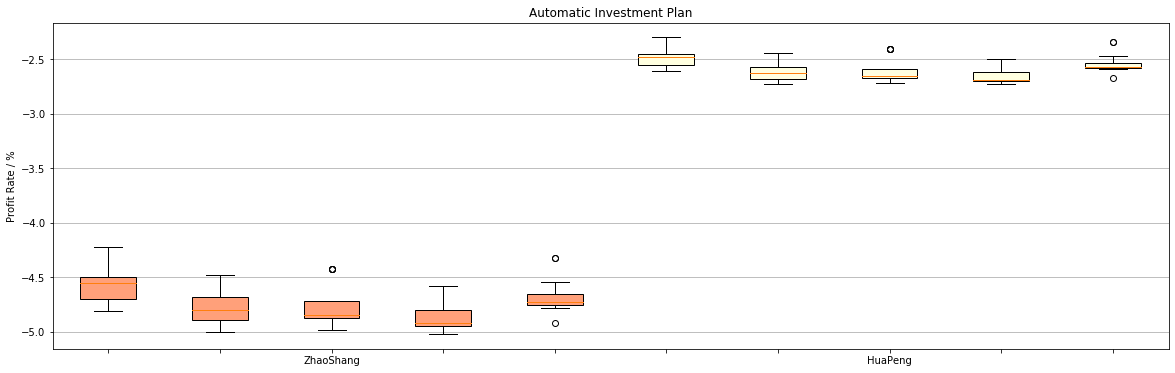

In [55]:
show_one_box_plot({'ZhaoShang':df_161725, 
                    'HuaPeng':df_160632
                  },
                 notch=False)

In [106]:
def show_diff_violin_plot(df_dict, figsize=(20, 7)):
    '''
    一次可以看多个基金的周定投-小提琴图
    
    :param df_dict: 基金字典    dict  {'LanChou':df_005827, 'GuoTaiChe':df_001790, 'ZhongOuYiliao':df_003095}
    :param figsize: 画布大小    tuple (20, 7)
    '''
    
    funds_cnt = len(df_dict)
    ax_list = [None for _ in range(funds_cnt)]
    plot_list = []
    labels = [f"week {day}" for day in range(1, 6)]
    
    fig, ax_list = plt.subplots(nrows=1, ncols=funds_cnt, figsize=figsize)
    
    i = 0
    for fund, fund_df in df_dict.items():
        # 每周一个box
        bodies = [fund_df.loc[fund_df['week'] == day]['profit_rate'] for day in range(1, 6)]
        
        violin_plot = ax_list[i].violinplot(bodies,
                                         showmeans=False,
                                         showmedians=True)
        ax_list[i].set_title(fund)
        plot_list.append(violin_plot)
        i += 1
        
    # adding horizontal grid lines
    for ax in ax_list:
        ax.yaxis.grid(True)
#         ax.set_xticks([i+1 for i in range(5)])
#         ax.set_xlabel('Four separate samples')
        ax.set_ylabel('Profit Rate / %')

    # add x-tick labels
    plt.setp(ax_list, xticks=[i+1 for i in range(5)],
             xticklabels=labels)
    
    plt.show()
        

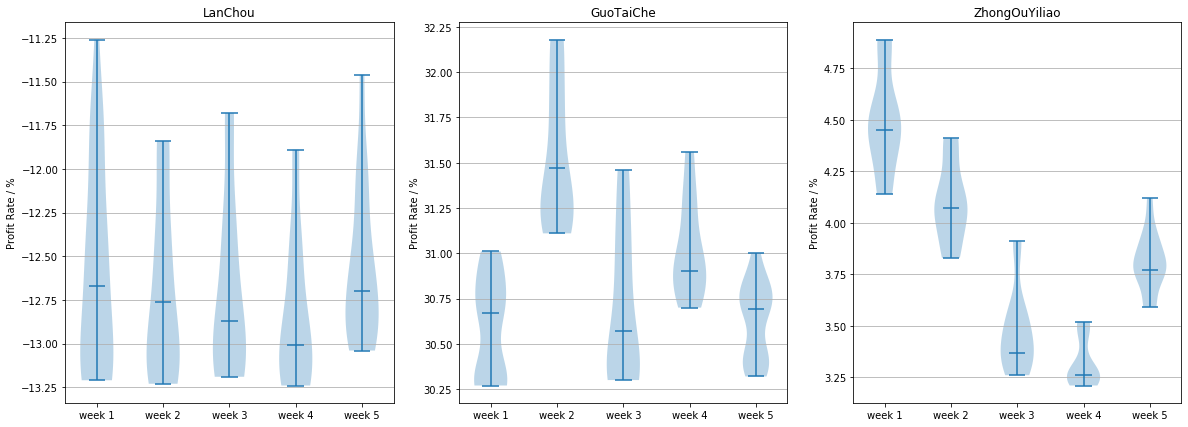

In [107]:
show_diff_violin_plot({'LanChou':df_005827, 
                    'GuoTaiChe':df_001790, 
                    'ZhongOuYiliao':df_003095})